In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
folder = "../../data/"
train_x = pd.read_csv(folder + 'x_train_ori.csv')
train_y = pd.read_csv(folder + 'y_train_ori.csv')
valid_x = pd.read_csv(folder + 'x_valid_ori.csv')
valid_y = pd.read_csv(folder + 'y_valid_ori.csv')
test_x = pd.read_csv(folder + 'x_test_ori.csv')
test_y = pd.read_csv(folder + 'y_test_ori.csv')

In [ ]:
random_seed=1

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('PotentialFraud', 1)]


In [ ]:
train_array_x = X_resampled.to_numpy()
train_array_y = y_resampled.to_numpy()
valid_array_x = valid_x.to_numpy()
valid_array_y = valid_y.to_numpy()
array_x = np.concatenate([train_array_x,valid_array_x],axis=0)
array_y = np.concatenate([train_array_y,valid_array_y],axis=0)
test_fold = np.concatenate([np.array(train_array_x.shape[0]*[-1,]),np.array(valid_array_x.shape[0]*[0,])],axis=0)

In [ ]:
from sklearn.model_selection import PredefinedSplit

In [ ]:
ps = PredefinedSplit(test_fold=test_fold)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [ ]:
from sklearn.metrics import precision_score,recall_score,ConfusionMatrixDisplay,confusion_matrix,f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV

## Selection Based on F1 Scores

In [ ]:
tree = DecisionTreeClassifier(random_state=random_seed)
tree_grid = GridSearchCV(tree,param_grid={'max_depth':[3,10,20,50],'min_samples_leaf':[2,6,10,20],
                                          'max_features':[None,'sqrt','log2',5,10,20]},
                        scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
tree_grid.fit(array_x,array_y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2; accuracy: (test=0.741) f1: (test=0.314) precision: (test=0.195) recall: (test=0.800) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=6; accuracy: (test=0.741) f1: (test=0.314) precision: (test=0.195) recall: (test=0.800) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10; accuracy: (test=0.741) f1: (test=0.314) precision: (test=0.195) recall: (test=0.800) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20; accuracy: (test=0.741) f1: (test=0.314) precision: (test=0.195) recall: (test=0.800) total time=   0.1s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.713) f1: (test=0.251) precision: (test=0.156) recall: (test=0.650) total time=   0.0s
[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.713) f1: 

[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10; accuracy: (test=0.872) f1: (test=0.400) precision: (test=0.307) recall: (test=0.575) total time=   0.1s
[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20; accuracy: (test=0.871) f1: (test=0.407) precision: (test=0.308) recall: (test=0.600) total time=   0.1s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=2; accuracy: (test=0.852) f1: (test=0.333) precision: (test=0.250) recall: (test=0.500) total time=   0.0s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6; accuracy: (test=0.876) f1: (test=0.407) precision: (test=0.315) recall: (test=0.575) total time=   0.0s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10; accuracy: (test=0.865) f1: (test=0.434) precision: (test=0.315) recall: (test=0.700) total time=   0.0s
[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=20; accuracy: (test=0.863) f1: (test=0.413) precision: (test=0.302) recall: (test=0.

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2', 5, 10, 20],
                         'min_samples_leaf': [2, 6, 10, 20]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [ ]:
tree_resampled = tree_grid.best_estimator_

In [ ]:
f1_score(y_resampled,tree_resampled.predict(X_resampled))

0.9576021519149481

In [ ]:
f1_score(test_y,tree_resampled.predict(test_x))

0.46875

In [ ]:
tree_resampled

DecisionTreeClassifier(max_depth=50, min_samples_leaf=6, random_state=1)

Accuracy Score

In [ ]:
tree_resampled.score(X_resampled,y_resampled)

0.9577374872318692

In [ ]:
tree_resampled.score(test_x,test_y)

0.8743068391866913

Recall Score

In [ ]:
recall_score(y_resampled,tree_resampled.predict(X_resampled))

0.9545454545454546

In [ ]:
recall_score(test_y,tree_resampled.predict(test_x))

0.5555555555555556

Precision Score

In [ ]:
precision_score(y_resampled,tree_resampled.predict(X_resampled))

0.9606784888203547

In [ ]:
precision_score(test_y,tree_resampled.predict(test_x))

0.40540540540540543

In [ ]:
pd.Series(tree_resampled.predict(test_x)).value_counts()

0.0    467
1.0     74
dtype: int64

In [ ]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_resampled,tree_resampled.predict(X_resampled))

0.9577374872318694

In [ ]:
roc_auc_score(test_y,tree_resampled.predict(test_x))

0.7326032397900981

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Selection Based on F1 Scores

In [ ]:
lr = LogisticRegression(random_state=1)
lr_grid = GridSearchCV(lr,param_grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                                       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                       'max_iter':[5,10,20,50,100]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
lr_grid.fit(array_x,array_y)

Fitting 1 folds for each of 100 candidates, totalling 100 fits
[CV 1/1] END max_iter=5, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=liblinear; accuracy: (test=0.806) f1: (test=0.340) precision: (test=0.227) recall: (test=0.675) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l1, solver=saga; accuracy: (test=0.810) f1: (test=0.352) precision: (test=0.235) recall: (test=0.700) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Libr

[CV 1/1] END max_iter=5, penalty=l2, solver=newton-cg; accuracy: (test=0.813) f1: (test=0.348) precision: (test=0.235) recall: (test=0.675) total time=   0.1s
[CV 1/1] END max_iter=5, penalty=l2, solver=lbfgs; accuracy: (test=0.810) f1: (test=0.344) precision: (test=0.231) recall: (test=0.675) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l2, solver=liblinear; accuracy: (test=0.804) f1: (test=0.321) precision: (test=0.216) recall: (test=0.625) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l2, solver=sag; accuracy: (test=0.811) f1: (test=0.338) precision: (test=0.228) recall: (test=0.650) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=l2, solver=saga; accuracy: (test=0.810) f1: (test=0.352) precision: (test=0.235) recall: (test=0.700) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=5, penalty=elasticnet, solver=lbfgs; ac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

[CV 1/1] END max_iter=5, penalty=none, solver=saga; accuracy: (test=0.810) f1: (test=0.352) precision: (test=0.235) recall: (test=0.700) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l1, solver=liblinear; accuracy: (test=0.811) f1: (test=0.346) precision: (test=0.233) recall: (test=0.675) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l1, solver=saga; accuracy: (test=0.808) f1: (test=0.333) precision: (test=0.224) recall: (test=0.650) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=l2, solver=newton-cg; accuracy: (test=0.789) f1: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/p

[CV 1/1] END max_iter=10, penalty=l2, solver=liblinear; accuracy: (test=0.784) f1: (test=0.291) precision: (test=0.192) recall: (test=0.600) total time=   0.1s
[CV 1/1] END max_iter=10, penalty=l2, solver=sag; accuracy: (test=0.808) f1: (test=0.333) precision: (test=0.224) recall: (test=0.650) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=l2, solver=saga; accuracy: (test=0.808) f1: (test=0.333) precision: (test=0.224) recall: (test=0.650) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=10, penalty=elasticnet, solver=sa

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fi

[CV 1/1] END max_iter=10, penalty=none, solver=saga; accuracy: (test=0.808) f1: (test=0.333) precision: (test=0.224) recall: (test=0.650) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l1, solver=liblinear; accuracy: (test=0.804) f1: (test=0.329) precision: (test=0.220) recall: (test=0.650) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l1, solver=saga; accuracy: (test=0.808) f1: (test=0.333) precision: (test=0.224) recall: (test=0.650) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/p

[CV 1/1] END max_iter=20, penalty=l2, solver=newton-cg; accuracy: (test=0.780) f1: (test=0.287) precision: (test=0.189) recall: (test=0.600) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=l2, solver=lbfgs; accuracy: (test=0.780) f1: (test=0.287) precision: (test=0.189) recall: (test=0.600) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=l2, solver=liblinear; accuracy: (test=0.784) f1: (test=0.291) precision: (test=0.192) recall: (test=0.600) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A colum

[CV 1/1] END max_iter=20, penalty=l2, solver=sag; accuracy: (test=0.804) f1: (test=0.321) precision: (test=0.216) recall: (test=0.625) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=l2, solver=saga; accuracy: (test=0.808) f1: (test=0.333) precision: (test=0.224) recall: (test=0.650) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=20, penalty=elasticnet, solver=saga; ac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3

[CV 1/1] END max_iter=20, penalty=none, solver=sag; accuracy: (test=0.804) f1: (test=0.321) precision: (test=0.216) recall: (test=0.625) total time=   0.1s
[CV 1/1] END max_iter=20, penalty=none, solver=saga; accuracy: (test=0.808) f1: (test=0.333) precision: (test=0.224) recall: (test=0.650) total time=   0.1s
[CV 1/1] END max_iter=50, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3

[CV 1/1] END max_iter=50, penalty=l1, solver=liblinear; accuracy: (test=0.787) f1: (test=0.294) precision: (test=0.195) recall: (test=0.600) total time=   1.3s
[CV 1/1] END max_iter=50, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l1, solver=saga; accuracy: (test=0.802) f1: (test=0.318) precision: (test=0.214) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_iter=50, penalty=l2, solver=newton-cg; accuracy: (test=0.780) f1: (test=0.287) precision: (test=0.189) recall: (test=0.600) total time=   0.1s
[CV 1/1] END max_iter=50, penalty=l2, solver=lbfgs; accuracy: (test=0.789) f1: (test=0.296) precision: (test=0.197) recall: (test=0.600) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=l2, solver=liblinear; accuracy: (test=0.784) f1: (test=0.291) precision: (test=0.192) recall: (test=0.600) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A colum

[CV 1/1] END max_iter=50, penalty=l2, solver=sag; accuracy: (test=0.799) f1: (test=0.314) precision: (test=0.210) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_iter=50, penalty=l2, solver=saga; accuracy: (test=0.802) f1: (test=0.318) precision: (test=0.214) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=50, penalty=elasticnet, solver=saga; ac

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: 

[CV 1/1] END max_iter=50, penalty=none, solver=sag; accuracy: (test=0.799) f1: (test=0.314) precision: (test=0.210) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_iter=50, penalty=none, solver=saga; accuracy: (test=0.802) f1: (test=0.318) precision: (test=0.214) recall: (test=0.625) total time=   0.2s
[CV 1/1] END max_iter=100, penalty=l1, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fi

[CV 1/1] END max_iter=100, penalty=l1, solver=liblinear; accuracy: (test=0.786) f1: (test=0.293) precision: (test=0.194) recall: (test=0.600) total time=   4.1s
[CV 1/1] END max_iter=100, penalty=l1, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END max_iter=100, penalty=l1, solver=saga; accuracy: (test=0.800) f1: (test=0.316) precision: (test=0.212) recall: (test=0.625) total time=   0.4s
[CV 1/1] END max_iter=100, penalty=l2, solver=newton-cg; accuracy: (test=0.780) f1: (test=0.287) precision: (test=0.189) recall: (test=0.600) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A colum

[CV 1/1] END max_iter=100, penalty=l2, solver=lbfgs; accuracy: (test=0.787) f1: (test=0.294) precision: (test=0.195) recall: (test=0.600) total time=   0.1s
[CV 1/1] END max_iter=100, penalty=l2, solver=liblinear; accuracy: (test=0.784) f1: (test=0.291) precision: (test=0.192) recall: (test=0.600) total time=   0.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END max_iter=100, penalty=l2, solver=sag; accuracy: (test=0.793) f1: (test=0.300) precision: (test=0.200) recall: (test=0.600) total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3

[CV 1/1] END max_iter=100, penalty=l2, solver=saga; accuracy: (test=0.799) f1: (test=0.314) precision: (test=0.210) recall: (test=0.625) total time=   0.3s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=newton-cg; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=liblinear; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=sag; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=elasticnet, solver=saga; accuracy: (test=nan) f1: (test=nan) precision: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/1] END max_iter=100, penalty=none, solver=newton

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py", line 455, in _check_solver
    "penalty='none' is not supported for the liblinear solver"
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/

[CV 1/1] END max_iter=100, penalty=none, solver=sag; accuracy: (test=0.793) f1: (test=0.300) precision: (test=0.200) recall: (test=0.600) total time=   0.3s
[CV 1/1] END max_iter=100, penalty=none, solver=saga; accuracy: (test=0.799) f1: (test=0.314) precision: (test=0.210) recall: (test=0.625) total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.80591497        nan 0.80961183 0.81330869
 0.80961183 0.80406654 0.81146026 0.80961183        nan        nan
        nan        nan        nan 0.81330869 0.80961183        nan
 0.81146026 0.80961183        nan        nan 0.81146026        nan
 0.8077634  0.78927911 0.8077634  0.78373383 0.8077634  0.8077634
        nan        nan        nan        nan        nan 0.78373383
 0.8077634         nan 0.8077634  0.8077634         nan        nan
 0.80406654        nan 0.8077634  0.78003697 0.78003697 0.78373383
 0.80406654 0.8077634         nan      

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [5, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [ ]:
lr_resampled = lr_grid.best_estimator_

In [ ]:
f1_score(y_resampled,lr_resampled.predict(X_resampled))

0.5779744035392637

In [ ]:
f1_score(test_y,lr_resampled.predict(test_x))

0.3472222222222222

In [ ]:
lr_resampled

LogisticRegression(max_iter=5, penalty='l1', random_state=1, solver='saga')

Accuracy Score

In [ ]:
lr_resampled = lr_grid.best_estimator_
lr_resampled.score(X_resampled,y_resampled)

0.6589632277834525

In [ ]:
lr_resampled.score(test_x,test_y)

0.8262476894639557

Recall Score

In [ ]:
recall_score(y_resampled,lr_resampled.predict(X_resampled))

0.46705822267620023

In [ ]:
recall_score(test_y,lr_resampled.predict(test_x))

0.46296296296296297

Precision Score

In [ ]:
precision_score(y_resampled,lr_resampled.predict(X_resampled))

0.7579776212184003

In [ ]:
precision_score(test_y,lr_resampled.predict(test_x))

0.2777777777777778

In [ ]:
pd.Series(lr_resampled.predict(test_x)).value_counts()

0.0    451
1.0     90
dtype: int64

In [ ]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [ ]:
roc_auc_score(y_resampled,lr_resampled.predict(X_resampled))

0.6589632277834525

In [ ]:
roc_auc_score(test_y,lr_resampled.predict(test_x))

0.6647463685451365

<Figure size 1440x720 with 0 Axes>

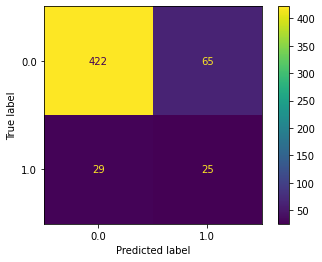

In [ ]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,lr_resampled.predict(test_x),labels=lr_resampled.classes_),display_labels=lr_resampled.classes_)
cm.plot()
plt.show()

# XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=1)
xgb_grid = GridSearchCV(xgb,param_grid = {'n_estimators':[50,100,300],
                                       'max_depth':[3,10],'min_child_weight':[0.01,0.1,0.2,0.5],
                                         'eta':[0.01,0.1,0.2,0.5]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
xgb_grid.fit(array_x,array_y)

Fitting 1 folds for each of 96 candidates, totalling 96 fits
[14:39:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.767) f1: (test=0.330) precision: (test=0.209) recall: (test=0.775) total time=   0.4s
[14:39:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.795) f1: (test=0.351) precision: (test=0.229) recall: (test=0.750) total time=   0.7s
[14:39:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.860) f1: (test=0.441) precision: (test=0.312) recall: (test=0.750) total time=   2.0s
[14:39:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.767) f1: (test=0.330) precision: (test=0.209) recall: (test=0.775) total time=   0.4s
[14:39:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.795) f1: (test=0.351) precision: (test=0.229) recall: (test=0.750) total time=   0.7s
[14:39:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.860) f1: (test=0.441) precision: (test=0.312) recall: (test=0.750) total time=   1.9s
[14:39:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.767) f1: (test=0.330) precision: (test=0.209) recall: (test=0.775) total time=   0.4s
[14:39:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.795) f1: (test=0.351) precision: (test=0.229) recall: (test=0.750) total time=   0.7s
[14:39:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.860) f1: (test=0.441) precision: (test=0.312) recall: (test=0.750) total time=   2.0s
[14:39:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.767) f1: (test=0.330) precision: (test=0.209) recall: (test=0.775) total time=   0.4s
[14:39:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.795) f1: (test=0.351) precision: (test=0.229) recall: (test=0.750) total time=   0.7s
[14:39:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.860) f1: (test=0.441) precision: (test=0.312) recall: (test=0.750) total time=   1.9s
[14:39:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.872) f1: (test=0.430) precision: (test=0.321) recall: (test=0.650) total time=   1.4s
[14:39:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.885) f1: (test=0.466) precision: (test=0.355) recall: (test=0.675) total time=   2.9s
[14:39:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.887) f1: (test=0.440) precision: (test=0.348) recall: (test=0.600) total time=  10.9s
[14:40:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.872) f1: (test=0.430) precision: (test=0.321) recall: (test=0.650) total time=   1.4s
[14:40:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.885) f1: (test=0.466) precision: (test=0.355) recall: (test=0.675) total time=   3.2s
[14:40:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.887) f1: (test=0.440) precision: (test=0.348) recall: (test=0.600) total time=  10.1s
[14:40:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.872) f1: (test=0.430) precision: (test=0.321) recall: (test=0.650) total time=   1.5s
[14:40:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.887) f1: (test=0.470) precision: (test=0.360) recall: (test=0.675) total time=   2.8s
[14:40:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.891) f1: (test=0.438) precision: (test=0.354) recall: (test=0.575) total time=   9.8s
[14:40:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.874) f1: (test=0.433) precision: (test=0.325) recall: (test=0.650) total time=   1.4s
[14:40:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.880) f1: (test=0.444) precision: (test=0.338) recall: (test=0.650) total time=   3.2s
[14:40:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.01, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.889) f1: (test=0.434) precision: (test=0.348) recall: (test=0.575) total time=   9.0s
[14:40:47] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.863) f1: (test=0.448) precision: (test=0.319) recall: (test=0.750) total time=   0.4s
[14:40:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.872) f1: (test=0.448) precision: (test=0.329) recall: (test=0.700) total time=   1.0s
[14:40:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.895) f1: (test=0.467) precision: (test=0.373) recall: (test=0.625) total time=   2.7s
[14:40:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.863) f1: (test=0.448) precision: (test=0.319) recall: (test=0.750) total time=   0.5s
[14:40:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.872) f1: (test=0.448) precision: (test=0.329) recall: (test=0.700) total time=   0.9s
[14:40:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.889) f1: (test=0.464) precision: (test=0.361) recall: (test=0.650) total time=   2.4s
[14:40:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.863) f1: (test=0.448) precision: (test=0.319) recall: (test=0.750) total time=   0.5s
[14:40:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.872) f1: (test=0.448) precision: (test=0.329) recall: (test=0.700) total time=   0.8s
[14:40:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.889) f1: (test=0.444) precision: (test=0.353) recall: (test=0.600) total time=   2.5s
[14:40:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.863) f1: (test=0.448) precision: (test=0.319) recall: (test=0.750) total time=   0.4s
[14:40:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.869) f1: (test=0.432) precision: (test=0.318) recall: (test=0.675) total time=   0.8s
[14:41:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.884) f1: (test=0.432) precision: (test=0.338) recall: (test=0.600) total time=   2.6s
[14:41:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.885) f1: (test=0.415) precision: (test=0.333) recall: (test=0.550) total time=   1.8s
[14:41:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.889) f1: (test=0.423) precision: (test=0.344) recall: (test=0.550) total time=   3.5s
[14:41:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.893) f1: (test=0.420) precision: (test=0.350) recall: (test=0.525) total time=  10.1s
[14:41:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.889) f1: (test=0.423) precision: (test=0.344) recall: (test=0.550) total time=   1.8s
[14:41:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.898) f1: (test=0.455) precision: (test=0.377) recall: (test=0.575) total time=   3.3s
[14:41:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.898) f1: (test=0.444) precision: (test=0.373) recall: (test=0.550) total time=   7.5s
[14:41:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.889) f1: (test=0.423) precision: (test=0.344) recall: (test=0.550) total time=   1.6s
[14:41:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.896) f1: (test=0.440) precision: (test=0.367) recall: (test=0.550) total time=   2.9s
[14:41:35] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.908) f1: (test=0.479) precision: (test=0.411) recall: (test=0.575) total time=   6.6s
[14:41:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.889) f1: (test=0.423) precision: (test=0.344) recall: (test=0.550) total time=   1.4s
[14:41:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.895) f1: (test=0.424) precision: (test=0.356) recall: (test=0.525) total time=   2.6s
[14:41:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.1, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.904) f1: (test=0.447) precision: (test=0.389) recall: (test=0.525) total time=   6.3s
[14:41:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.867) f1: (test=0.419) precision: (test=0.310) recall: (test=0.650) total time=   0.6s
[14:41:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.880) f1: (test=0.435) precision: (test=0.333) recall: (test=0.625) total time=   1.2s
[14:41:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.895) f1: (test=0.447) precision: (test=0.365) recall: (test=0.575) total time=   3.0s
[14:41:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.867) f1: (test=0.419) precision: (test=0.310) recall: (test=0.650) total time=   1.0s
[14:41:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.880) f1: (test=0.435) precision: (test=0.333) recall: (test=0.625) total time=   1.6s
[14:42:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.904) f1: (test=0.490) precision: (test=0.403) recall: (test=0.625) total time=   3.6s
[14:42:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.867) f1: (test=0.419) precision: (test=0.310) recall: (test=0.650) total time=   1.0s
[14:42:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.876) f1: (test=0.427) precision: (test=0.325) recall: (test=0.625) total time=   1.8s
[14:42:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.896) f1: (test=0.451) precision: (test=0.371) recall: (test=0.575) total time=   4.4s
[14:42:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.861) f1: (test=0.409) precision: (test=0.299) recall: (test=0.650) total time=   2.6s
[14:42:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.878) f1: (test=0.421) precision: (test=0.324) recall: (test=0.600) total time=   2.4s
[14:42:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.889) f1: (test=0.444) precision: (test=0.353) recall: (test=0.600) total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:42:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.893) f1: (test=0.431) precision: (test=0.355) recall: (test=0.550) total time=   3.2s
[14:42:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   3.3s
[14:42:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.900) f1: (test=0.438) precision: (test=0.375) recall: (test=0.525) total time=   9.3s
[14:42:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.895) f1: (test=0.424) precision: (test=0.356) recall: (test=0.525) total time=   1.7s
[14:42:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.895) f1: (test=0.412) precision: (test=0.351) recall: (test=0.500) total time=   2.9s
[14:42:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.904) f1: (test=0.447) precision: (test=0.389) recall: (test=0.525) total time=   7.3s
[14:42:49] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.896) f1: (test=0.440) precision: (test=0.367) recall: (test=0.550) total time=   1.8s
[14:42:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   3.3s
[14:42:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.902) f1: (test=0.454) precision: (test=0.386) recall: (test=0.550) total time=   6.8s
[14:43:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.898) f1: (test=0.444) precision: (test=0.373) recall: (test=0.550) total time=   1.3s
[14:43:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.900) f1: (test=0.426) precision: (test=0.370) recall: (test=0.500) total time=   2.1s
[14:43:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.2, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.898) f1: (test=0.421) precision: (test=0.364) recall: (test=0.500) total time=   3.8s
[14:43:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.885) f1: (test=0.446) precision: (test=0.347) recall: (test=0.625) total time=   0.3s
[14:43:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.885) f1: (test=0.392) precision: (test=0.323) recall: (test=0.500) total time=   0.6s
[14:43:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.904) f1: (test=0.447) precision: (test=0.389) recall: (test=0.525) total time=   1.9s
[14:43:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.898) f1: (test=0.466) precision: (test=0.381) recall: (test=0.600) total time=   0.5s
[14:43:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.893) f1: (test=0.453) precision: (test=0.364) recall: (test=0.600) total time=   0.6s
[14:43:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.895) f1: (test=0.447) precision: (test=0.365) recall: (test=0.575) total time=   1.7s
[14:43:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.885) f1: (test=0.436) precision: (test=0.343) recall: (test=0.600) total time=   0.3s
[14:43:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.889) f1: (test=0.412) precision: (test=0.339) recall: (test=0.525) total time=   0.6s
[14:43:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.895) f1: (test=0.436) precision: (test=0.361) recall: (test=0.550) total time=   1.6s
[14:43:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.880) f1: (test=0.425) precision: (test=0.329) recall: (test=0.600) total time=   0.3s
[14:43:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.895) f1: (test=0.447) precision: (test=0.365) recall: (test=0.575) total time=   0.6s
[14:43:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=3, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.893) f1: (test=0.420) precision: (test=0.350) recall: (test=0.525) total time=   1.7s
[14:43:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.01, n_estimators=50; accuracy: (test=0.906) f1: (test=0.452) precision: (test=0.396) recall: (test=0.525) total time=   1.1s
[14:43:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.01, n_estimators=100; accuracy: (test=0.906) f1: (test=0.452) precision: (test=0.396) recall: (test=0.525) total time=   2.0s
[14:43:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.01, n_estimators=300; accuracy: (test=0.908) f1: (test=0.457) precision: (test=0.404) recall: (test=0.525) total time=   4.8s
[14:43:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.1, n_estimators=50; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   0.9s
[14:43:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.1, n_estimators=100; accuracy: (test=0.896) f1: (test=0.429) precision: (test=0.362) recall: (test=0.525) total time=   1.5s
[14:43:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.1, n_estimators=300; accuracy: (test=0.900) f1: (test=0.438) precision: (test=0.375) recall: (test=0.525) total time=   3.3s
[14:43:32] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.2, n_estimators=50; accuracy: (test=0.904) f1: (test=0.447) precision: (test=0.389) recall: (test=0.525) total time=   0.8s
[14:43:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.2, n_estimators=100; accuracy: (test=0.908) f1: (test=0.457) precision: (test=0.404) recall: (test=0.525) total time=   1.4s
[14:43:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.452) precision: (test=0.396) recall: (test=0.525) total time=   3.0s
[14:43:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.5, n_estimators=50; accuracy: (test=0.904) f1: (test=0.447) precision: (test=0.389) recall: (test=0.525) total time=   0.9s
[14:43:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.5, n_estimators=100; accuracy: (test=0.906) f1: (test=0.452) precision: (test=0.396) recall: (test=0.525) total time=   1.4s
[14:43:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[CV 1/1] END eta=0.5, max_depth=10, min_child_weight=0.5, n_estimators=300; accuracy: (test=0.906) f1: (test=0.452) precision: (test=0.396) recall: (test=0.525) total time=   2.6s
[14:43:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_we...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=1, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                       

F1 Score

In [ ]:
xgb_resampled = xgb_grid.best_estimator_

In [ ]:
f1_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9947883564255752

In [ ]:
f1_score(test_y,xgb_resampled.predict(test_x))

0.5663716814159292

In [ ]:
xgb_resampled

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.2, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.200000003,
              max_delta_step=0, max_depth=3, min_child_weight=0.1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy Score

In [ ]:
xgb_resampled = xgb_grid.best_estimator_
xgb_resampled.score(X_resampled,y_resampled)

0.9947650663942799

In [ ]:
xgb_resampled.score(test_x,test_y)

0.9094269870609981

Recall Score

In [ ]:
recall_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9992339121552605

In [ ]:
recall_score(test_y,xgb_resampled.predict(test_x))

0.5925925925925926

Precision Score

In [ ]:
precision_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9903821817261452

In [ ]:
precision_score(test_y,xgb_resampled.predict(test_x))

0.5423728813559322

In [ ]:
pd.Series(xgb_resampled.predict(test_x)).value_counts()

0.0    482
1.0     59
dtype: int64

In [ ]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_resampled,xgb_resampled.predict(X_resampled))

0.9947650663942798

In [ ]:
roc_auc_score(test_y,xgb_resampled.predict(test_x))

0.7685755570765838

<Figure size 1440x720 with 0 Axes>

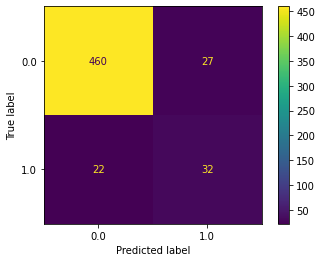

In [ ]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,xgb_resampled.predict(test_x),labels=xgb_resampled.classes_),display_labels=xgb_resampled.classes_)
cm.plot()
plt.show()

# Random Forest

## Without Adding Graph Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf_grid = GridSearchCV(rf,param_grid = {'n_estimators':[50,100,300],
                                       'max_depth':[3,10,20],'min_samples_leaf':[6,10,20],
                                          'max_features':['sqrt','log2',10,20]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
rf_grid.fit(array_x,array_y)

Fitting 1 folds for each of 108 candidates, totalling 108 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.823) f1: (test=0.400) precision: (test=0.267) recall: (test=0.800) total time=   0.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.828) f1: (test=0.408) precision: (test=0.274) recall: (test=0.800) total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.835) f1: (test=0.411) precision: (test=0.279) recall: (test=0.775) total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.826) f1: (test=0.405) precision: (test=0.271) recall: (test=0.800) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.828) f1: (test=0.415) precision: (test=0.277) recall: (test=0.825) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.837) f1: (test=0.405) precision: (test=0.278) recall: (test=0.750) total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.828) f1: (test=0.408) precision: (test=0.274) recall: (test=0.800) total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.830) f1: (test=0.410) precision: (test=0.276) recall: (test=0.800) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=sqrt, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.835) f1: (test=0.411) precision: (test=0.279) recall: (test=0.775) total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.832) f1: (test=0.381) precision: (test=0.262) recall: (test=0.700) total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.830) f1: (test=0.395) precision: (test=0.268) recall: (test=0.750) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.837) f1: (test=0.405) precision: (test=0.278) recall: (test=0.750) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.832) f1: (test=0.381) precision: (test=0.262) recall: (test=0.700) total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.830) f1: (test=0.395) precision: (test=0.268) recall: (test=0.750) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.839) f1: (test=0.408) precision: (test=0.280) recall: (test=0.750) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.830) f1: (test=0.378) precision: (test=0.259) recall: (test=0.700) total time=   0.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.832) f1: (test=0.397) precision: (test=0.270) recall: (test=0.750) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.835) f1: (test=0.403) precision: (test=0.275) recall: (test=0.750) total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.832) f1: (test=0.405) precision: (test=0.274) recall: (test=0.775) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.826) f1: (test=0.397) precision: (test=0.267) recall: (test=0.775) total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.832) f1: (test=0.413) precision: (test=0.278) recall: (test=0.800) total time=   3.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.832) f1: (test=0.405) precision: (test=0.274) recall: (test=0.775) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.826) f1: (test=0.397) precision: (test=0.267) recall: (test=0.775) total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.832) f1: (test=0.413) precision: (test=0.278) recall: (test=0.800) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.832) f1: (test=0.405) precision: (test=0.274) recall: (test=0.775) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.828) f1: (test=0.400) precision: (test=0.270) recall: (test=0.775) total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.830) f1: (test=0.410) precision: (test=0.276) recall: (test=0.800) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.817) f1: (test=0.393) precision: (test=0.260) recall: (test=0.800) total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.806) f1: (test=0.379) precision: (test=0.248) recall: (test=0.800) total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.800) f1: (test=0.372) precision: (test=0.242) recall: (test=0.800) total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.817) f1: (test=0.393) precision: (test=0.260) recall: (test=0.800) total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.806) f1: (test=0.379) precision: (test=0.248) recall: (test=0.800) total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.800) f1: (test=0.372) precision: (test=0.242) recall: (test=0.800) total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.817) f1: (test=0.393) precision: (test=0.260) recall: (test=0.800) total time=   1.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.806) f1: (test=0.379) precision: (test=0.248) recall: (test=0.800) total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.800) f1: (test=0.372) precision: (test=0.242) recall: (test=0.800) total time=   6.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.874) f1: (test=0.404) precision: (test=0.311) recall: (test=0.575) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.874) f1: (test=0.382) precision: (test=0.300) recall: (test=0.525) total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.876) f1: (test=0.407) precision: (test=0.315) recall: (test=0.575) total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.876) f1: (test=0.396) precision: (test=0.310) recall: (test=0.550) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.876) f1: (test=0.407) precision: (test=0.315) recall: (test=0.575) total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.876) f1: (test=0.417) precision: (test=0.320) recall: (test=0.600) total time=   4.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.869) f1: (test=0.393) precision: (test=0.299) recall: (test=0.575) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.872) f1: (test=0.389) precision: (test=0.301) recall: (test=0.550) total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=sqrt, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.386) precision: (test=0.297) recall: (test=0.550) total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.880) f1: (test=0.425) precision: (test=0.329) recall: (test=0.600) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.878) f1: (test=0.411) precision: (test=0.319) recall: (test=0.575) total time=   1.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.874) f1: (test=0.393) precision: (test=0.306) recall: (test=0.550) total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.874) f1: (test=0.404) precision: (test=0.311) recall: (test=0.575) total time=   0.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.878) f1: (test=0.421) precision: (test=0.324) recall: (test=0.600) total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.876) f1: (test=0.407) precision: (test=0.315) recall: (test=0.575) total time=   4.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.871) f1: (test=0.407) precision: (test=0.308) recall: (test=0.600) total time=   0.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.878) f1: (test=0.421) precision: (test=0.324) recall: (test=0.600) total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.872) f1: (test=0.389) precision: (test=0.301) recall: (test=0.550) total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.887) f1: (test=0.450) precision: (test=0.352) recall: (test=0.625) total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.884) f1: (test=0.442) precision: (test=0.342) recall: (test=0.625) total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.882) f1: (test=0.429) precision: (test=0.333) recall: (test=0.600) total time=   8.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.880) f1: (test=0.444) precision: (test=0.338) recall: (test=0.650) total time=   1.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.878) f1: (test=0.421) precision: (test=0.324) recall: (test=0.600) total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.876) f1: (test=0.407) precision: (test=0.315) recall: (test=0.575) total time=   8.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.872) f1: (test=0.439) precision: (test=0.325) recall: (test=0.675) total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.878) f1: (test=0.431) precision: (test=0.329) recall: (test=0.625) total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.407) precision: (test=0.308) recall: (test=0.600) total time=   8.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.880) f1: (test=0.454) precision: (test=0.342) recall: (test=0.675) total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.882) f1: (test=0.448) precision: (test=0.342) recall: (test=0.650) total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.884) f1: (test=0.452) precision: (test=0.347) recall: (test=0.650) total time=  16.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.876) f1: (test=0.446) precision: (test=0.333) recall: (test=0.675) total time=   2.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.872) f1: (test=0.430) precision: (test=0.321) recall: (test=0.650) total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.872) f1: (test=0.420) precision: (test=0.316) recall: (test=0.625) total time=  16.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.869) f1: (test=0.441) precision: (test=0.322) recall: (test=0.700) total time=   2.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.863) f1: (test=0.422) precision: (test=0.307) recall: (test=0.675) total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.865) f1: (test=0.425) precision: (test=0.310) recall: (test=0.675) total time=  15.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.889) f1: (test=0.434) precision: (test=0.348) recall: (test=0.575) total time=   1.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.887) f1: (test=0.408) precision: (test=0.333) recall: (test=0.525) total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.887) f1: (test=0.419) precision: (test=0.338) recall: (test=0.550) total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.885) f1: (test=0.415) precision: (test=0.333) recall: (test=0.550) total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.887) f1: (test=0.419) precision: (test=0.338) recall: (test=0.550) total time=   1.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.415) precision: (test=0.333) recall: (test=0.550) total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.874) f1: (test=0.404) precision: (test=0.311) recall: (test=0.575) total time=   0.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.876) f1: (test=0.396) precision: (test=0.310) recall: (test=0.550) total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=sqrt, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.872) f1: (test=0.389) precision: (test=0.301) recall: (test=0.550) total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.884) f1: (test=0.411) precision: (test=0.328) recall: (test=0.550) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.889) f1: (test=0.423) precision: (test=0.344) recall: (test=0.550) total time=   1.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.891) f1: (test=0.416) precision: (test=0.344) recall: (test=0.525) total time=   4.9s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.891) f1: (test=0.427) precision: (test=0.349) recall: (test=0.550) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.889) f1: (test=0.423) precision: (test=0.344) recall: (test=0.550) total time=   1.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.889) f1: (test=0.434) precision: (test=0.348) recall: (test=0.575) total time=   4.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.878) f1: (test=0.411) precision: (test=0.319) recall: (test=0.575) total time=   0.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.874) f1: (test=0.404) precision: (test=0.311) recall: (test=0.575) total time=   1.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.874) f1: (test=0.414) precision: (test=0.316) recall: (test=0.600) total time=   4.4s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.887) f1: (test=0.396) precision: (test=0.328) recall: (test=0.500) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.887) f1: (test=0.396) precision: (test=0.328) recall: (test=0.500) total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.889) f1: (test=0.423) precision: (test=0.344) recall: (test=0.550) total time=  17.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.887) f1: (test=0.440) precision: (test=0.348) recall: (test=0.600) total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.885) f1: (test=0.436) precision: (test=0.343) recall: (test=0.600) total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.426) precision: (test=0.338) recall: (test=0.575) total time=  12.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.871) f1: (test=0.417) precision: (test=0.312) recall: (test=0.625) total time=   1.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.869) f1: (test=0.403) precision: (test=0.304) recall: (test=0.600) total time=   3.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.872) f1: (test=0.400) precision: (test=0.307) recall: (test=0.575) total time=  10.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=6, n_estimators=50; accuracy: (test=0.872) f1: (test=0.389) precision: (test=0.301) recall: (test=0.550) total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=6, n_estimators=100; accuracy: (test=0.884) f1: (test=0.422) precision: (test=0.333) recall: (test=0.575) total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=6, n_estimators=300; accuracy: (test=0.885) f1: (test=0.436) precision: (test=0.343) recall: (test=0.600) total time=  23.5s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.878) f1: (test=0.450) precision: (test=0.338) recall: (test=0.675) total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.882) f1: (test=0.448) precision: (test=0.342) recall: (test=0.650) total time=   7.7s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.880) f1: (test=0.435) precision: (test=0.333) recall: (test=0.625) total time=  22.3s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.867) f1: (test=0.438) precision: (test=0.318) recall: (test=0.700) total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.863) f1: (test=0.413) precision: (test=0.302) recall: (test=0.650) total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.867) f1: (test=0.429) precision: (test=0.314) recall: (test=0.675) total time=  17.0s


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20],
                         'max_features': ['sqrt', 'log2', 10, 20],
                         'min_samples_leaf': [6, 10, 20],
                         'n_estimators': [50, 100, 300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [ ]:
rf_resampled = rf_grid.best_estimator_

In [ ]:
f1_score(y_resampled,rf_resampled.predict(X_resampled))

0.9686674216685542

In [ ]:
f1_score(test_y,rf_resampled.predict(test_x))

0.544

In [ ]:
rf_resampled

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=6,
                       n_estimators=50, random_state=1)

Accuracy Score

In [ ]:
rf_resampled = rf_grid.best_estimator_
rf_resampled.score(X_resampled,y_resampled)

0.9682073544433095

In [ ]:
rf_resampled.score(test_x,test_y)

0.8946395563770795

Recall Score

In [ ]:
recall_score(y_resampled,rf_resampled.predict(X_resampled))

0.9828907048008172

In [ ]:
recall_score(test_y,rf_resampled.predict(test_x))

0.6296296296296297

Precision Score

In [ ]:
precision_score(y_resampled,rf_resampled.predict(X_resampled))

0.9548499131729099

In [ ]:
precision_score(test_y,rf_resampled.predict(test_x))

0.4788732394366197

In [ ]:
pd.Series(rf_resampled.predict(test_x)).value_counts()

0.0    470
1.0     71
dtype: int64

In [ ]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_resampled,rf_resampled.predict(X_resampled))

0.9682073544433094

In [ ]:
roc_auc_score(test_y,rf_resampled.predict(test_x))

0.776827135143357

<Figure size 1440x720 with 0 Axes>

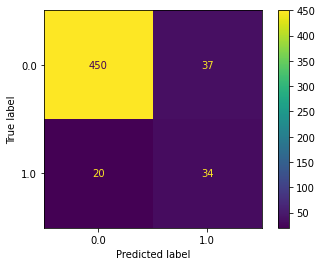

In [ ]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,rf_resampled.predict(test_x),labels=rf_resampled.classes_),display_labels=rf_resampled.classes_)
cm.plot()
plt.show()

feature importance on data with graph features

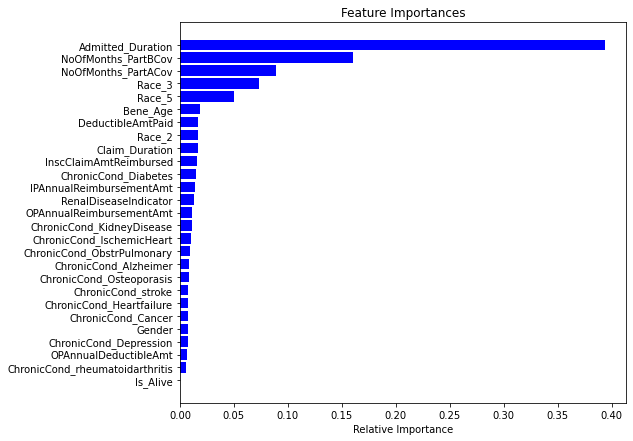

In [ ]:
features = train_x.columns
importances = rf_resampled.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## With Graph Features

In [ ]:
train_x = pd.concat([train_x,graph_train],axis=1)
valid_x = pd.concat([valid_x,graph_valid],axis=1)
test_x = pd.concat([test_x,graph_test],axis=1)

In [ ]:
random_seed=1

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(train_x, train_y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

[('PotentialFraud', 1)]


In [ ]:
train_array_x = X_resampled.to_numpy()
train_array_y = y_resampled.to_numpy()
valid_array_x = valid_x.to_numpy()
valid_array_y = valid_y.to_numpy()
array_x = np.concatenate([train_array_x,valid_array_x],axis=0)
array_y = np.concatenate([train_array_y,valid_array_y],axis=0)
test_fold = np.concatenate([np.array(train_array_x.shape[0]*[-1,]),np.array(valid_array_x.shape[0]*[0,])],axis=0)

In [ ]:
from sklearn.model_selection import PredefinedSplit

In [ ]:
ps = PredefinedSplit(test_fold=test_fold)

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf_grid = GridSearchCV(rf,param_grid = {'n_estimators':[50,100,300],
                                       'max_depth':[3,10,20],'min_samples_leaf':[2,10,20],
                                          'max_features':['log2',10,20]},
                       scoring=['accuracy','recall','precision','f1'],
                        verbose=5,cv=ps,refit='f1')
rf_grid.fit(array_x,array_y)

Fitting 1 folds for each of 135 candidates, totalling 135 fits


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   7.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=  15.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=  31.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   2.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   5.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=  17.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.845) f1: (test=0.447) precision: (test=0.304) recall: (test=0.850) total time=   2.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.843) f1: (test=0.452) precision: (test=0.304) recall: (test=0.875) total time=   5.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=None, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.845) f1: (test=0.447) precision: (test=0.304) recall: (test=0.850) total time=  17.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   2.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.841) f1: (test=0.442) precision: (test=0.298) recall: (test=0.850) total time=   2.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.839) f1: (test=0.439) precision: (test=0.296) recall: (test=0.850) total time=   2.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.841) f1: (test=0.442) precision: (test=0.298) recall: (test=0.850) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.835) f1: (test=0.426) precision: (test=0.287) recall: (test=0.825) total time=   0.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.839) f1: (test=0.431) precision: (test=0.292) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=5, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.839) f1: (test=0.439) precision: (test=0.296) recall: (test=0.850) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=   0.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.845) f1: (test=0.432) precision: (test=0.296) recall: (test=0.800) total time=   1.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=   4.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=   0.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.845) f1: (test=0.432) precision: (test=0.296) recall: (test=0.800) total time=   1.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.845) f1: (test=0.440) precision: (test=0.300) recall: (test=0.825) total time=  10.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.848) f1: (test=0.453) precision: (test=0.309) recall: (test=0.850) total time=   3.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.847) f1: (test=0.443) precision: (test=0.303) recall: (test=0.825) total time=   5.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.843) f1: (test=0.430) precision: (test=0.294) recall: (test=0.800) total time=  12.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.839) f1: (test=0.424) precision: (test=0.288) recall: (test=0.800) total time=   1.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   8.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.839) f1: (test=0.424) precision: (test=0.288) recall: (test=0.800) total time=   1.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   7.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.839) f1: (test=0.424) precision: (test=0.288) recall: (test=0.800) total time=   1.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   2.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=3, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.847) f1: (test=0.435) precision: (test=0.299) recall: (test=0.800) total time=   7.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.896) f1: (test=0.481) precision: (test=0.382) recall: (test=0.650) total time=   7.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.481) precision: (test=0.391) recall: (test=0.625) total time=  16.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.896) f1: (test=0.472) precision: (test=0.379) recall: (test=0.625) total time=  43.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.885) f1: (test=0.475) precision: (test=0.359) recall: (test=0.700) total time=   7.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.885) f1: (test=0.475) precision: (test=0.359) recall: (test=0.700) total time=  14.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.475) precision: (test=0.359) recall: (test=0.700) total time=  41.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.872) f1: (test=0.457) precision: (test=0.333) recall: (test=0.725) total time=   7.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.876) f1: (test=0.472) precision: (test=0.345) recall: (test=0.750) total time=  15.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=None, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=  43.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   6.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.878) f1: (test=0.476) precision: (test=0.349) recall: (test=0.750) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.878) f1: (test=0.484) precision: (test=0.352) recall: (test=0.775) total time=   5.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.869) f1: (test=0.450) precision: (test=0.326) recall: (test=0.725) total time=   0.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.863) f1: (test=0.431) precision: (test=0.311) recall: (test=0.700) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   6.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   1.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   5.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.878) f1: (test=0.476) precision: (test=0.349) recall: (test=0.750) total time=   1.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.878) f1: (test=0.484) precision: (test=0.352) recall: (test=0.775) total time=   7.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.869) f1: (test=0.450) precision: (test=0.326) recall: (test=0.725) total time=   0.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.863) f1: (test=0.431) precision: (test=0.311) recall: (test=0.700) total time=   1.7s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=5, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   5.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.898) f1: (test=0.495) precision: (test=0.391) recall: (test=0.675) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.895) f1: (test=0.486) precision: (test=0.380) recall: (test=0.675) total time=   4.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.889) f1: (test=0.474) precision: (test=0.365) recall: (test=0.675) total time=  12.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=   4.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.492) precision: (test=0.366) recall: (test=0.750) total time=  14.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.885) f1: (test=0.508) precision: (test=0.372) recall: (test=0.800) total time=   2.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   4.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.876) f1: (test=0.464) precision: (test=0.341) recall: (test=0.725) total time=  11.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.893) f1: (test=0.473) precision: (test=0.371) recall: (test=0.650) total time=   3.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.895) f1: (test=0.477) precision: (test=0.377) recall: (test=0.650) total time=   7.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.896) f1: (test=0.481) precision: (test=0.382) recall: (test=0.650) total time=  23.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.898) f1: (test=0.513) precision: (test=0.397) recall: (test=0.725) total time=   3.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.895) f1: (test=0.504) precision: (test=0.387) recall: (test=0.725) total time=   7.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.896) f1: (test=0.525) precision: (test=0.397) recall: (test=0.775) total time=  21.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.885) f1: (test=0.492) precision: (test=0.366) recall: (test=0.750) total time=   3.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.887) f1: (test=0.504) precision: (test=0.373) recall: (test=0.775) total time=   6.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=10, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.472) precision: (test=0.349) recall: (test=0.725) total time=  19.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.908) f1: (test=0.479) precision: (test=0.411) recall: (test=0.575) total time=  11.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=  21.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.913) f1: (test=0.472) precision: (test=0.429) recall: (test=0.525) total time= 1.1min


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.895) f1: (test=0.486) precision: (test=0.380) recall: (test=0.675) total time=   9.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.882) f1: (test=0.458) precision: (test=0.346) recall: (test=0.675) total time=  20.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.885) f1: (test=0.466) precision: (test=0.355) recall: (test=0.675) total time=  59.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.874) f1: (test=0.460) precision: (test=0.337) recall: (test=0.725) total time=   7.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.876) f1: (test=0.472) precision: (test=0.345) recall: (test=0.750) total time=  16.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=None, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.880) f1: (test=0.480) precision: (test=0.353) recall: (test=0.750) total time=  54.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.900) f1: (test=0.471) precision: (test=0.387) recall: (test=0.600) total time=   1.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   2.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.909) f1: (test=0.484) precision: (test=0.418) recall: (test=0.575) total time=   8.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   1.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   7.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.871) f1: (test=0.470) precision: (test=0.337) recall: (test=0.775) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.867) f1: (test=0.446) precision: (test=0.322) recall: (test=0.725) total time=   2.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=log2, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   6.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.900) f1: (test=0.471) precision: (test=0.387) recall: (test=0.600) total time=   1.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.900) f1: (test=0.449) precision: (test=0.379) recall: (test=0.550) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.909) f1: (test=0.484) precision: (test=0.418) recall: (test=0.575) total time=   8.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   1.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.882) f1: (test=0.484) precision: (test=0.357) recall: (test=0.750) total time=   2.3s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.884) f1: (test=0.488) precision: (test=0.361) recall: (test=0.750) total time=   7.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.871) f1: (test=0.470) precision: (test=0.337) recall: (test=0.775) total time=   1.0s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.867) f1: (test=0.446) precision: (test=0.322) recall: (test=0.725) total time=   2.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=5, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.871) f1: (test=0.462) precision: (test=0.333) recall: (test=0.750) total time=   7.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=   2.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.902) f1: (test=0.430) precision: (test=0.377) recall: (test=0.500) total time=   5.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.440) precision: (test=0.392) recall: (test=0.500) total time=  16.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.891) f1: (test=0.478) precision: (test=0.370) recall: (test=0.675) total time=   2.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.884) f1: (test=0.462) precision: (test=0.351) recall: (test=0.675) total time=   4.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.891) f1: (test=0.504) precision: (test=0.380) recall: (test=0.750) total time=  11.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   1.8s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.882) f1: (test=0.492) precision: (test=0.360) recall: (test=0.775) total time=   4.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=10, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.876) f1: (test=0.464) precision: (test=0.341) recall: (test=0.725) total time=  13.1s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=2, n_estimators=50; accuracy: (test=0.913) f1: (test=0.505) precision: (test=0.436) recall: (test=0.600) total time=   5.4s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=2, n_estimators=100; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=  11.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=2, n_estimators=300; accuracy: (test=0.906) f1: (test=0.463) precision: (test=0.400) recall: (test=0.550) total time=  35.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=50; accuracy: (test=0.900) f1: (test=0.518) precision: (test=0.403) recall: (test=0.725) total time=   4.5s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=100; accuracy: (test=0.898) f1: (test=0.513) precision: (test=0.397) recall: (test=0.725) total time=   9.2s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=10, n_estimators=300; accuracy: (test=0.898) f1: (test=0.522) precision: (test=0.400) recall: (test=0.750) total time=  25.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=50; accuracy: (test=0.891) f1: (test=0.496) precision: (test=0.377) recall: (test=0.725) total time=   3.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=100; accuracy: (test=0.885) f1: (test=0.500) precision: (test=0.369) recall: (test=0.775) total time=   6.9s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV 1/1] END max_depth=20, max_features=20, min_samples_leaf=20, n_estimators=300; accuracy: (test=0.887) f1: (test=0.496) precision: (test=0.370) recall: (test=0.750) total time=  20.6s


C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [3, 10, 20],
                         'max_features': [None, 'log2', 5, 10, 20],
                         'min_samples_leaf': [2, 10, 20],
                         'n_estimators': [50, 100, 300]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'],
             verbose=5)

F1 Score

In [ ]:
rf_resampled = rf_grid.best_estimator_

In [ ]:
f1_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9678634195330154

In [ ]:
f1_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.640625

In [ ]:
rf_resampled

RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=10,
                       n_estimators=300, random_state=1)

Accuracy Score

In [ ]:
rf_resampled = rf_grid.best_estimator_
rf_resampled.score(X_resampled,y_resampled)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9673135852911133

In [ ]:
rf_resampled.score(test_x,test_y)

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9149722735674677

Recall Score

In [ ]:
recall_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9844228804902962

In [ ]:
recall_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.7592592592592593

Precision Score

In [ ]:
precision_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9518518518518518

In [ ]:
precision_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.5540540540540541

In [ ]:
pd.Series(rf_resampled.predict(test_x)).value_counts()

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.0    467
1.0     74
dtype: int64

In [ ]:
test_y.value_counts()

PotentialFraud
0.0               487
1.0                54
dtype: int64

AUC Score

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_resampled,rf_resampled.predict(X_resampled))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9673135852911133

In [ ]:
roc_auc_score(test_y,rf_resampled.predict(test_x))

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.8457487261388699

C:\Users\Shi Yingfei\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Figure size 1440x720 with 0 Axes>

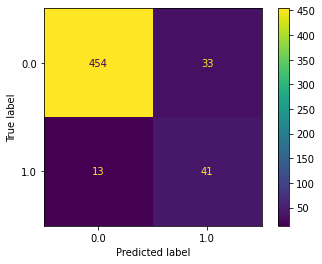

In [ ]:
plt.figure(figsize=(20,10))
cm = ConfusionMatrixDisplay(confusion_matrix(test_y,rf_resampled.predict(test_x),labels=rf_resampled.classes_),display_labels=rf_resampled.classes_)
cm.plot()
plt.show()